In [1]:
# Dependencies and Setup
# Pandas dependency
import pandas as pd

# Plotting dependencies
import matplotlib.pyplot as plt
import seaborn as sns

# Linear regression dependencies and statistical dependencies
import scipy.stats as stats

In [2]:
# Load clean data CSV file created in Part 1 into a Pandas DataFrame
df = pd.read_csv("../Resources/Diversity_in_tech_companies_clean_data.csv")

# Display sample data
df.head(10)

,Unnamed: 0,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared,Gender Total %,Diversity Total %
0,0,2018,Yahoo!,37.0,63.0,45.0,44.0,4.0,2.0,2.0,3.0,0.0,100.0,100.0
1,1,2018,Google,31.0,69.0,53.0,36.0,4.0,3.0,4.0,0.0,0.0,100.0,100.0
2,2,2018,Apple,32.0,68.0,54.0,21.0,13.0,9.0,3.0,1.0,2.0,100.0,103.0
3,3,2018,Cisco,24.0,76.0,53.0,37.0,5.0,4.0,1.0,0.0,0.0,100.0,100.0
4,4,2018,eBay,40.0,60.0,50.0,39.0,6.0,3.0,1.0,1.0,0.0,100.0,100.0
5,5,2018,HP,37.0,63.0,73.0,12.0,8.0,4.0,2.0,0.0,0.0,100.0,99.0
6,6,2018,Indiegogo,50.0,50.0,58.0,28.0,7.0,4.0,0.0,3.0,0.0,100.0,100.0
7,7,2018,Nvidia,17.0,83.0,37.0,45.0,3.0,1.0,14.0,0.0,0.0,100.0,100.0
8,8,2018,Dell,28.0,72.0,69.0,9.0,11.0,10.0,0.0,1.0,0.0,100.0,100.0
9,9,2018,Ingram Micro,31.0,69.0,52.0,14.0,19.0,14.0,1.0,0.0,0.0,100.0,100.0


In [3]:
# Examine data and datatypes
print(df.shape)
print(df.info())
print(df.describe())

(91, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         91 non-null     int64  
 1   Year               91 non-null     int64  
 2   Company            91 non-null     object 
 3   Female %           91 non-null     float64
 4   Male %             91 non-null     float64
 5   % White            91 non-null     float64
 6   % Asian            91 non-null     float64
 7   % Latino           91 non-null     float64
 8   % Black            91 non-null     float64
 9   % Multi            91 non-null     float64
 10  % Other            91 non-null     float64
 11  % Undeclared       91 non-null     float64
 12  Gender Total %     91 non-null     float64
 13  Diversity Total %  91 non-null     float64
dtypes: float64(11), int64(2), object(1)
memory usage: 10.1+ KB
None
       Unnamed: 0         Year   Female %     Male 

## Standarize colors on all charts

In [4]:
diversity_colors = {'% White':'#EC111A', 
          '% Asian':'#F2609E', 
          '% Black':'#FFD42F', 
          '% Latino':'#138468', 
          '% Multi':'#009DD6', 
          '% Other':'#FB6330', 
          '% Undeclared':'#7849B8'}
gender_colors = ['lightblue', 'pink']

In [5]:
df.describe()

,Unnamed: 0,Year,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared,Gender Total %,Diversity Total %
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,46.000000,2016.142857,35.406593,64.571429,59.208791,22.637363,7.263736,5.461538,2.329670,1.241758,0.428571,99.978022,98.571429
std,27.448943,1.434274,9.553333,9.570955,9.905685,11.994922,4.057463,4.316139,3.283139,1.344459,1.795939,0.209657,8.306815
min,0.000000,2014.000000,16.000000,46.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,54.000000
25%,22.500000,2015.000000,29.000000,57.000000,52.500000,12.500000,4.000000,2.000000,0.000000,0.000000,0.000000,100.000000,100.000000
50%,46.000000,2016.000000,36.000000,64.000000,60.000000,22.000000,6.000000,4.000000,1.000000,1.000000,0.000000,100.000000,100.000000
75%,69.500000,2017.000000,43.000000,71.000000,66.000000,31.000000,9.000000,8.000000,3.000000,2.000000,0.000000,100.000000,100.000000
max,93.000000,2018.000000,54.000000,84.000000,79.000000,45.000000,19.000000,21.000000,14.000000,5.000000,13.000000,101.000000,103.000000


## Statistical Testing - Gender

In [6]:
print(f"Female variance: {df['Female %'].var()}")
print(f"Male variance: {df['Male %'].var()}")

Female variance: 91.26617826617827
Male variance: 91.60317460317455


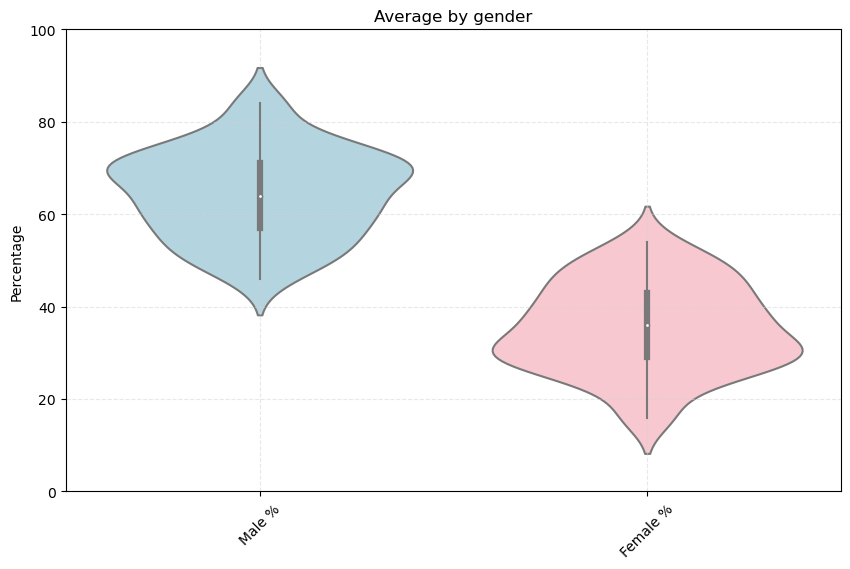

In [7]:
# Comparason of gender using a violin plot
# 1. Get the data
gender_df = df[['Male %','Female %']]

# 2. Make the canvas
plt.figure(figsize=(10, 6))

# 3. Plot the data
sns.violinplot(data=gender_df, palette=gender_colors)
plt.title('Average by gender')
plt.ylabel("Percentage")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.5, color='lightgray')

# 4. Show/Save the plot
plt.show()

### Average comparison of gender across all years and all companies

In [8]:
# FULL HYPOTHESIS

# NULL: THERE IS NO DIFFERENCE BETWEEN MALES VS FEMALES WORKING IN TECH COMPANIES
# ALTERNATIVE: THERE IS A DIFFERENCE BETWEEN MALES VS FEMALES WORKING IN TECH COMPANIES

# BASED ON MY EXPECTATIONS - I EXPECT SIGNIFICANT DIFFERENCE BETWEEN MALES VS FEMALE WORKING IN TECH COMPANIES

In [9]:
males = df['Male %']
females = df['Female %']

stats.ttest_ind(males, females, equal_var = False)

TtestResult(statistic=20.573574726611028, pvalue=3.78484545338512e-49, df=179.9993887209176)

In [10]:
# I REJECT THE NULL HYPOTHESIS AND ACCEPT THE ALTERNATIVE - THERE IS A SIGNIFICANT DIFFERENCE BETWEEN MALES AND FEMALE WORKING IN TECH COMPANIES

## Statistical Testing - Diversity

In [11]:
diversity_df = df[['% White', '% Asian', '% Black', '% Latino', '% Multi', '% Other', '% Undeclared']]
diversity_df.head()

,% White,% Asian,% Black,% Latino,% Multi,% Other,% Undeclared
0,45.0,44.0,2.0,4.0,2.0,3.0,0.0
1,53.0,36.0,3.0,4.0,4.0,0.0,0.0
2,54.0,21.0,9.0,13.0,3.0,1.0,2.0
3,53.0,37.0,4.0,5.0,1.0,0.0,0.0
4,50.0,39.0,3.0,6.0,1.0,1.0,0.0


In [12]:
diversity_df.describe()

,% White,% Asian,% Black,% Latino,% Multi,% Other,% Undeclared
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,59.208791,22.637363,5.461538,7.263736,2.329670,1.241758,0.428571
std,9.905685,11.994922,4.316139,4.057463,3.283139,1.344459,1.795939
min,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.500000,12.500000,2.000000,4.000000,0.000000,0.000000,0.000000
50%,60.000000,22.000000,4.000000,6.000000,1.000000,1.000000,0.000000
75%,66.000000,31.000000,8.000000,9.000000,3.000000,2.000000,0.000000
max,79.000000,45.000000,21.000000,19.000000,14.000000,5.000000,13.000000


In [13]:
print(f"White variance: {df['% White'].var()}")
print(f"Asian variance: {df['% Asian'].var()}")
print(f"Black variance: {df['% Black'].var()}")
print(f"Latino variance: {df['% Latino'].var()}")
print(f"Multi variance: {df['% Multi'].var()}")
print(f"Other variance: {df['% Other'].var()}")
print(f"Undeclared variance: {df['% Undeclared'].var()}")

White variance: 98.12258852258854
Asian variance: 143.87814407814403
Black variance: 18.629059829059834
Latino variance: 16.463003663003658
Multi variance: 10.77899877899878
Other variance: 1.807570207570206
Undeclared variance: 3.22539682539682


In [14]:
diversity_colors_lst = diversity_colors.values()
diversity_colors_lst

dict_values(['#EC111A', '#F2609E', '#FFD42F', '#138468', '#009DD6', '#FB6330', '#7849B8'])

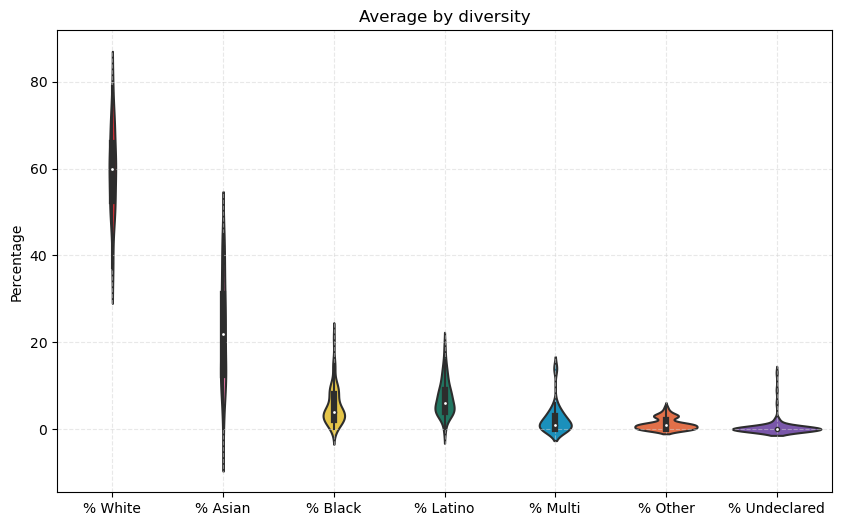

In [15]:
# Comparason of diversity using a violin plot
# 1. Get the data
## Using the diversity_df dataframe created above

# 2. Make the canvas
plt.figure(figsize=(10, 6))

# 3. Plot the data
sns.violinplot(data=diversity_df, palette=diversity_colors_lst)
plt.title('Average by diversity')
plt.ylabel("Percentage")
#plt.ylim(-10, 100)
plt.grid(linestyle='--', alpha=0.5, color='lightgray')

# 4. Show/Save the plot
plt.show()

### Average comparison of diversity across all years and all companies

In [16]:
# FULL HYPOTHESIS

# NULL: THERE IS NO DIFFERENCE OF AVERAGES BETWEEN ANY DIVERSITY GROUP
# ALTERNATIVE: THERE IS AT LEAST ONE DIFFERENCE BETWEEN DIVERSITY GROUPS

In [17]:
# Performe the ANOVA test
stats.f_oneway(diversity_df['% White'], 
               diversity_df['% Asian'], 
               diversity_df['% Black'], 
               diversity_df['% Latino'], 
               diversity_df['% Multi'], 
               diversity_df['% Other'], 
               diversity_df['% Undeclared']
               )

F_onewayResult(statistic=985.8325475532455, pvalue=2.47133054e-316)

In [18]:
# WE REJECT THE NULL AND ACCEPT THE ALTERNATIVE - AT LEAST ONE DIVERSITY GROUP IS DIFFERENT

In [19]:
print(f"White vs Asian: {stats.ttest_ind(diversity_df['% White'], diversity_df['% Asian'], equal_var = False)}")
print(f"White vs Black: {stats.ttest_ind(diversity_df['% White'], diversity_df['% Black'], equal_var = False)}")
print(f"White vs Latino: {stats.ttest_ind(diversity_df['% White'], diversity_df['% Latino'], equal_var = False)}")
print(f"White vs Multi: {stats.ttest_ind(diversity_df['% White'], diversity_df['% Multi'], equal_var = False)}")
print(f"White vs Other: {stats.ttest_ind(diversity_df['% White'], diversity_df['% Other'], equal_var = False)}")
print(f"White vs Undeclared: {stats.ttest_ind(diversity_df['% White'], diversity_df['% Undeclared'], equal_var = False)}")

White vs Asian: TtestResult(statistic=22.426127199064165, pvalue=3.4974324485005776e-53, df=173.78741107942048)
White vs Black: TtestResult(statistic=47.45100949423269, pvalue=6.374334017920352e-81, df=122.98495278778121)
White vs Latino: TtestResult(statistic=46.29135565132039, pvalue=4.13282193180125e-78, df=119.3735241720709)
White vs Multi: TtestResult(statistic=51.99438750290772, pvalue=4.870119400677852e-79, df=109.537654889487)
White vs Other: TtestResult(statistic=55.316345330041564, pvalue=3.910652332452989e-73, df=93.31475419432466)
White vs Undeclared: TtestResult(statistic=55.69860802269435, pvalue=7.557267383459079e-75, df=95.9104106591678)


In [20]:
print(f"Asian vs Black: {stats.ttest_ind(diversity_df['% Asian'], diversity_df['% Black'], equal_var = False)}")
print(f"Asian vs Latino: {stats.ttest_ind(diversity_df['% Asian'], diversity_df['% Latino'], equal_var = False)}")
print(f"Asian vs Multi: {stats.ttest_ind(diversity_df['% Asian'], diversity_df['% Multi'], equal_var = False)}")
print(f"Asian vs Other: {stats.ttest_ind(diversity_df['% Asian'], diversity_df['% Other'], equal_var = False)}")
print(f"Asian vs Undeclared: {stats.ttest_ind(diversity_df['% Asian'], diversity_df['% Undeclared'], equal_var = False)}")

Asian vs Black: TtestResult(statistic=12.852924987195221, pvalue=7.644253536628321e-24, df=112.92177336927801)
Asian vs Latino: TtestResult(statistic=11.581759018419703, pvalue=8.827328477772503e-21, df=110.3300092458146)
Asian vs Multi: TtestResult(statistic=15.577446894105972, pvalue=6.992841235175281e-29, df=103.40989499464588)
Asian vs Other: TtestResult(statistic=16.909733828894062, pvalue=5.166342130749162e-30, df=92.26101951932218)
Asian vs Undeclared: TtestResult(statistic=17.467632811843643, pvalue=2.8276886801936257e-31, df=94.03313383302206)


In [21]:
print(f"Black vs Latino: {stats.ttest_ind(diversity_df['% Black'], diversity_df['% Latino'], equal_var = False)}")
print(f"Black vs Multi: {stats.ttest_ind(diversity_df['% Black'], diversity_df['% Multi'], equal_var = False)}")
print(f"Black vs Other: {stats.ttest_ind(diversity_df['% Black'], diversity_df['% Other'], equal_var = False)}")
print(f"Black vs Undeclared: {stats.ttest_ind(diversity_df['% Black'], diversity_df['% Undeclared'], equal_var = False)}")

Black vs Latino: TtestResult(statistic=-2.9021422691618346, pvalue=0.004171105579260181, df=179.31680824799332)
Black vs Multi: TtestResult(statistic=5.509231046627633, pvalue=1.3317013546634914e-07, df=168.02727152668047)
Black vs Other: TtestResult(statistic=8.904425131520638, pvalue=1.4956780083145585e-14, df=107.30242991242221)
Black vs Undeclared: TtestResult(statistic=10.270102429424778, pvalue=3.7853392676111054e-18, df=120.25779691951077)


In [22]:
print(f"Latino vs Multi: {stats.ttest_ind(diversity_df['% Latino'], diversity_df['% Multi'], equal_var = False)}")
print(f"Latino vs Other: {stats.ttest_ind(diversity_df['% Latino'], diversity_df['% Other'], equal_var = False)}")
print(f"Latino vs Undeclared: {stats.ttest_ind(diversity_df['% Latino'], diversity_df['% Undeclared'], equal_var = False)}")

Latino vs Multi: TtestResult(statistic=9.017914867341968, pvalue=3.608912970795619e-16, df=172.49074872237733)
Latino vs Other: TtestResult(statistic=13.439520313134684, pvalue=6.477281620974978e-25, df=109.52785001293975)
Latino vs Undeclared: TtestResult(statistic=14.69482678067052, pvalue=6.301597651996616e-29, df=123.96164151053163)


In [23]:
print(f"Multi vs Other: {stats.ttest_ind(diversity_df['% Multi'], diversity_df['% Other'], equal_var = False)}")
print(f"Multi vs Undeclared: {stats.ttest_ind(diversity_df['% Multi'], diversity_df['% Undeclared'], equal_var = False)}")

Multi vs Other: TtestResult(statistic=2.92523538481525, pvalue=0.004120717814921395, df=119.35924965926462)
Multi vs Undeclared: TtestResult(statistic=4.846109485972371, pvalue=3.3103904655276187e-06, df=139.43501659992066)


In [24]:
print(f"Other vs Undeclared: {stats.ttest_ind(diversity_df['% Other'], diversity_df['% Undeclared'], equal_var = False)}")

Other vs Undeclared: TtestResult(statistic=3.457792920018384, pvalue=0.0006911859728477218, df=166.76559172686433)
